In [1]:
from factor_processing_utils import *

In [11]:
start_date = "2020-01-01"
end_date = "2025-07-01"
index_item = "000852.XSHG"
change_days = [5, 10, 20]
month_day = 20
year_day = 252

stock_universe = INDEX_FIX(start_date, end_date, index_item)
stock_list = stock_universe.columns.tolist()
date_list = stock_universe.index.tolist()


# factor_name = "opr_mrq"
# factor_definition = Factor("profit_from_operation_mrq_0") / Factor(
#     "operating_revenue_mrq_0"
# )


factor_name = "high"
factor_definition = Factor("high")
HIGH = Factor("high")
LOW = Factor("low")
OPEN = Factor("open")
CLOSE = Factor("close")
VOLUME = Factor("volume")
TURNOVER = Factor("total_turnover")


def turnover_ratio(order_book_ids, start_date, end_date):
    return (
        get_turnover_rate(order_book_ids, start_date, end_date, fields="today")
        .today.unstack("order_book_id")
        .reindex(
            columns=order_book_ids,
            index=pd.to_datetime(get_trading_dates(start_date, end_date)),
        )
    )


DAILY_TURNOVER_RATE = UserDefinedLeafFactor("DAILY_TURNOVER_RATE", turnover_ratio)


factor_name = "liq_zamount"
# factor_definition = (CLOSE / REF(CLOSE, month_day) - 1) * -1
factor_path = f"factor_lib/{factor_name}_{index_item}_{start_date}_{end_date}.pkl"

In [12]:
try:
    factor_raw = pd.read_pickle(factor_path)
    print(f"读取因子{factor_name}数据成功")
except:
    print(f"因子{factor_name}数据不存在，开始计算")
    factor_raw = execute_factor(factor_definition, stock_list, start_date, end_date)
    os.makedirs(os.path.dirname(factor_path), exist_ok=True)
    factor_raw.to_pickle(factor_path)
# 数据清洗
factor_clean = data_clean(factor_raw, stock_universe, index_item)
# 计算IC
for change_day in change_days:
    ic, performance = calc_ic(factor_clean, change_day, index_item, factor_name)

读取因子liq_zamount数据成功
{'name': 'liq_zamount', 'change_day': 5, 'IC mean': 0.0343, 'IC std': 0.0575, 'IR': 0.5966, 'IC>0': 0.7236, 'ABS_IC>2%': 0.7613, 't_stat': 21.7099}
{'name': 'liq_zamount', 'change_day': 10, 'IC mean': 0.0372, 'IC std': 0.0566, 'IR': 0.6578, 'IC>0': 0.7324, 'ABS_IC>2%': 0.7726, 't_stat': 23.8913}
{'name': 'liq_zamount', 'change_day': 20, 'IC mean': 0.0416, 'IC std': 0.0535, 'IR': 0.777, 'IC>0': 0.7647, 'ABS_IC>2%': 0.7563, 't_stat': 28.1134}


 当前：1320 / 总量：1329

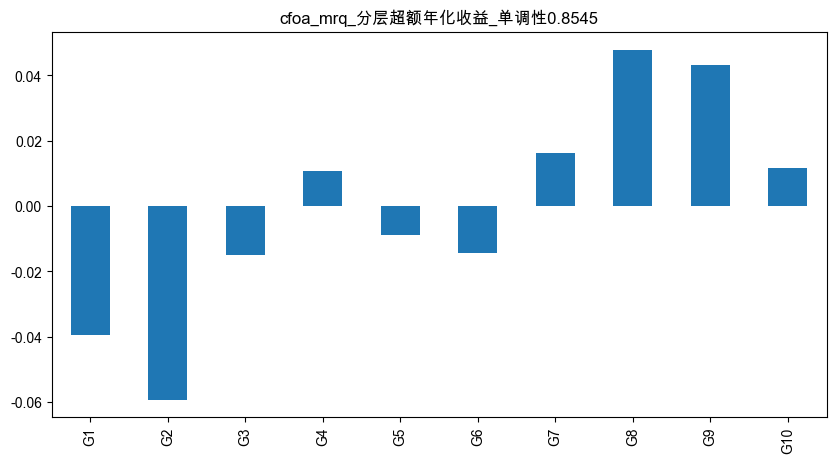

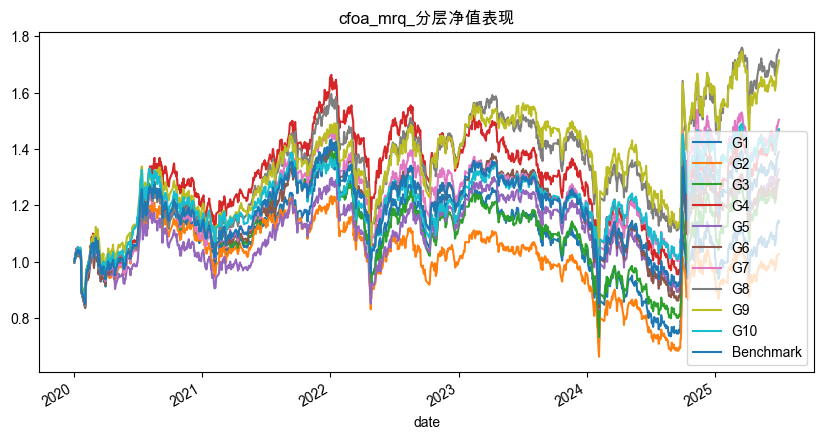

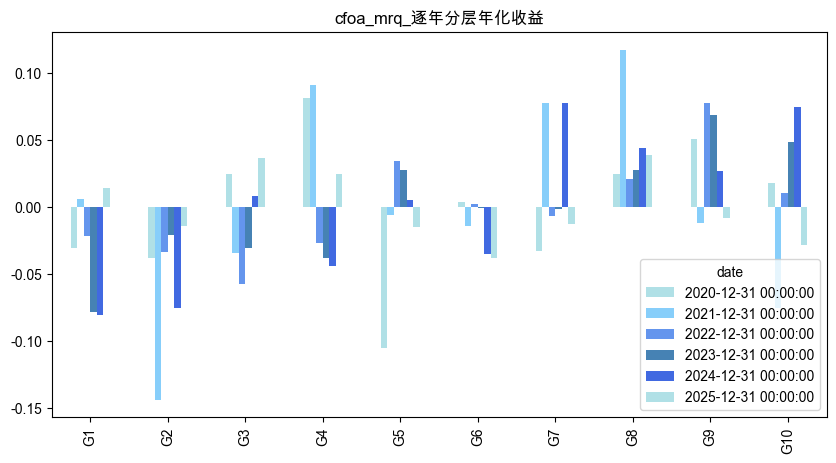

In [10]:
# 分组回测
group_return, turnover = group_g(
    factor_clean, change_day, 10, index_item, name=factor_name
)

In [ ]:
turnover